In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv


## Before Starting anything let's first Install and import the important libraries With the help of which we'll explore and visualise about the dataset first.

In [2]:
!pip install plotly
!pip install gensim
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for interative charts we'll use plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## **Let's Import the dataset to our notebook first**

In [4]:
data = pd.read_csv('/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')

In [5]:
data.head(2)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Let's see the first Glance about the data. Abiut the columns their data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1300 non-null   object 
 2   full_name                         954 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1084 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

## - From the Data We can see that there are So many missing values are there across different columns.
## - Also many columns do not have proper datadtypes. for examples.overall_score has to be in Numerical datatypes(int, float) but they are in Object format

### Let's Understand our Data a little bit

<Axes: title={'center': 'Count of Creator of Superheroes'}, xlabel='creator'>

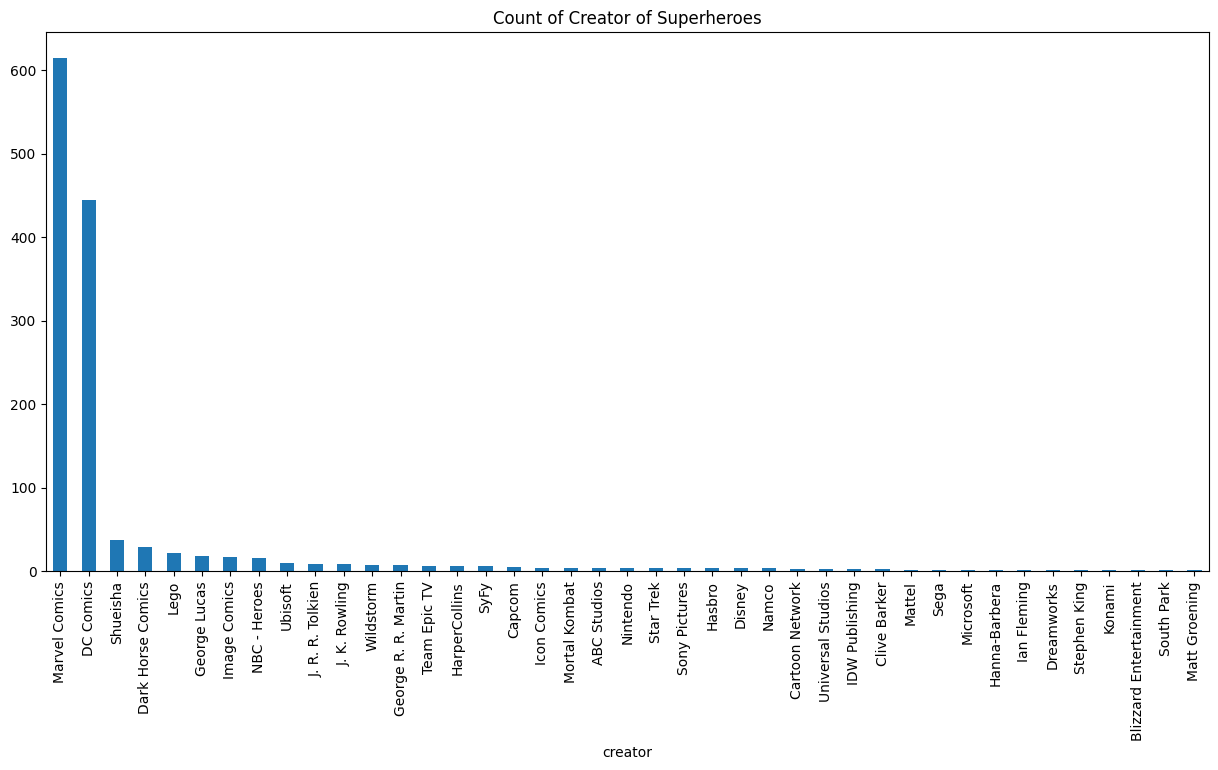

In [7]:
# Which Creator company have created most of the Supeheros
data['creator'].value_counts().plot(kind='bar',
                                    figsize=(15,7),
                                   title='Count of Creator of Superheroes')

## - From the above plot, we can see that Marvel and DC are two main companies who are creating Superheros. 
## - As Other companies doesn't have much Values We can Compile it Rest of the companies as **Other's**  

In [8]:
DC = data[(data['creator'] == "DC Comics")]
Marvel = data[(data['creator'] == "Marvel Comics")]
vis_data = data.copy(deep=True)
vis_data['creator'].loc[(vis_data['creator']!="DC Comics") & (vis_data['creator']!="Marvel Comics")]  = "Others"

## Let's Visuliase the Data how does it look Now.

In [9]:
def creator_count(data):
    trace = go.Bar(x = data['creator'].value_counts().values.tolist(),
                   y = ['Marvel Comics','DC Comics', 'Others'],
                   orientation = 'h',
                    textfont=dict(size=15),
                    textposition = 'auto',
                   text=data['creator'].value_counts().values.tolist(),
                   base=['red', 'blue','orchid']    
                    )
    layout = dict(title =  'Count of Creator of Superheroes')
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [10]:
def creator_percent(data):
    trace = go.Pie(labels = ['Marvel Comics','DC Comics', 'Others'], values = data['creator'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['red', 'blue','darkgoldenrod'])
                  )


    layout = dict(title =  'Distribution of Creator of Superheroes')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [11]:
# Calling the function
creator_count(vis_data)

In [12]:
creator_percent(vis_data)

#### **Creators of Superheroes**

* **615 (42.4%)** of the superheroes are from **Marvel Comics**
* **444 (30.6%)** of the superheroes are from **DC Comics** 
* **391 (27%)** of the superheroes are from other comics.


## **We have a Gender columns as well. Let's visualise how the Superheros are distributed Gender wise**

In [13]:
# Calling the function for Gender
creator_count(vis_data )

In [14]:
def gender_count(data):
    trace = go.Bar( x = data['gender'].value_counts().values.tolist(), 
                    y = ['Male','Female' ], 
                    orientation = 'h', 
                    text=data['gender'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    opacity = 0.8,marker=dict(
                    color=['gold', 'deeppink'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Gender of Superheroes')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [15]:
# Calling the Functions to see the Gender Count
gender_count(vis_data)

In [16]:
def gender_percent(data):
    trace = go.Pie(labels = ['Male','Female'], values = data['gender'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['gold', 'deeppink'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Gender of Superheroes')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [17]:
gender_percent(data)

### **From the distribution we can see that almost 75% of the Superheros are Male.**

## **Now let's Try to answer our questions That has been asked in the assignment**

### Q1. How would you define most powerful superhero from the information available in dataset?

#### Ans. 
- **Looking at the different columns, there could be many KPIs (Key Performance Indicators) that we can define.**
- **There are specific columns, such as power stats features including 'intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score', etc., onto which we can analyze who is more powerful.**
- **Before jumping to any conclusions, let's first visualize these columns.**


In [18]:
scores_columns_df = data[['intelligence_score','strength_score','speed_score','durability_score','power_score','combat_score']]

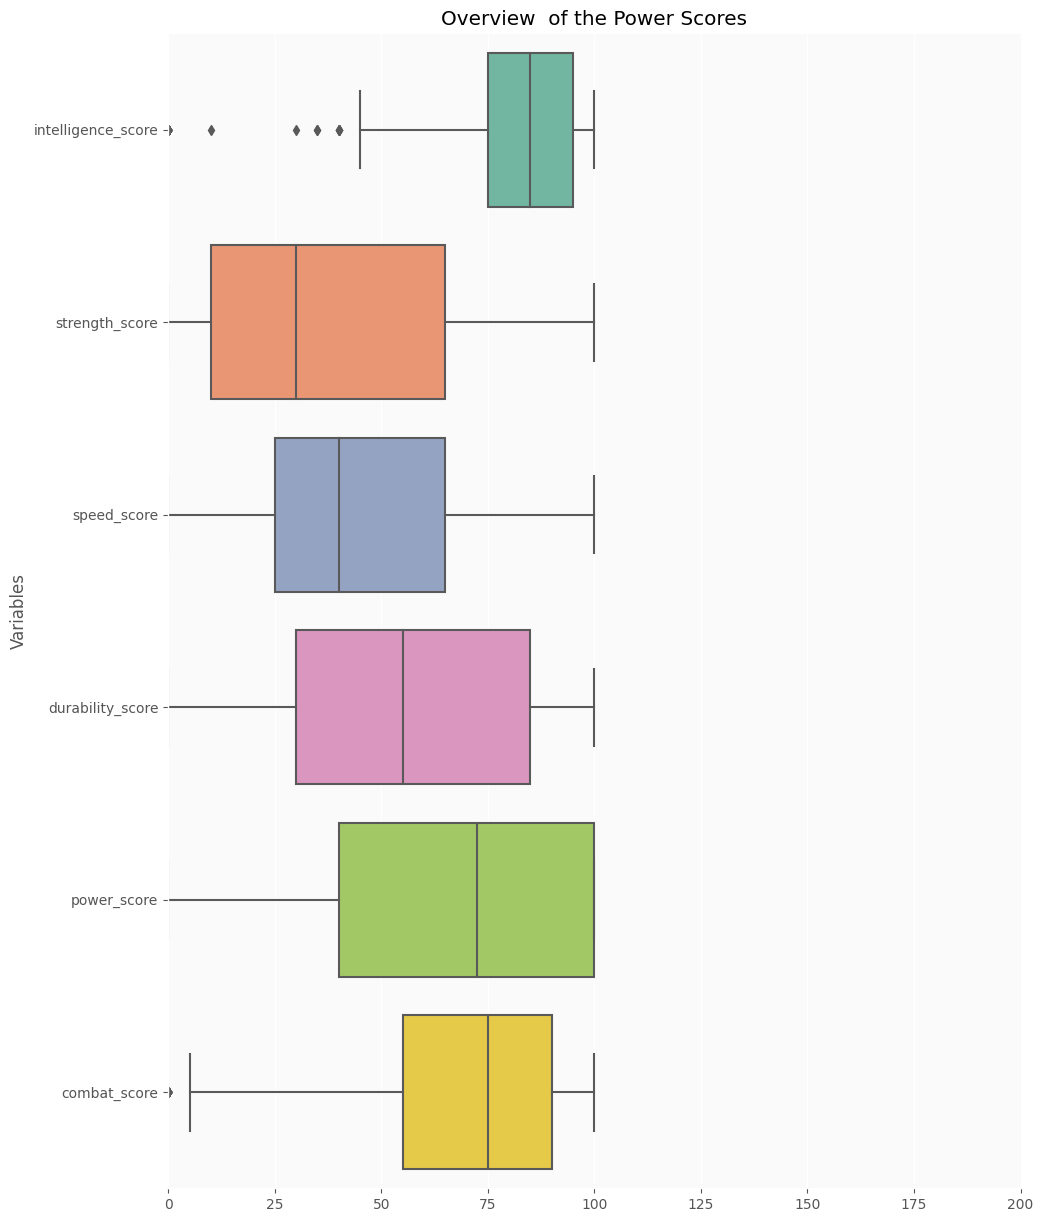

In [19]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview  of the Power Scores")
ax = sns.boxplot(data = scores_columns_df, 
  orient = 'h', 
  palette = 'Set2')

#### **Looking at the data, we can see that some scores, such as the Intelligent score, have outliers, which means that some superheroes have better intelligence power than others.**

Let's Explore how these Scores are correlated with each other

In [20]:
def correlation_plot():
    #correlation
    correlation = scores_columns_df.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [21]:
correlation_plot()

### We have So many columns which reflect the superhero's Power's. let's Keep This as Defintion of being a most number of powerfull superpower

In [22]:
data.loc[:, 'total_superpowers'] = data.iloc[:, 31:].sum(axis=1)

In [23]:
most_power_full_superhere=data[['name','total_superpowers','creator']].sort_values('total_superpowers',ascending=False)
most_power_full_superhere.head(1)

,name,total_superpowers,creator
1281,The Golden Master,47.0,NaN


## !!! **The Golden Master** is the superhero with most number of powers ####

### Q1(a). Who is the most powerful superhero from each creator? 

In [24]:

result = most_power_full_superhere.groupby('creator')['total_superpowers'].idxmax()

In [25]:
data.loc[result, ['creator', 'name', 'total_superpowers']].sort_values(by='total_superpowers', ascending=False)

,creator,name,total_superpowers
174,DC Comics,Black Alice,42.0
393,Shueisha,Devilman,39.0
421,Konami,Dracula,36.0
976,Marvel Comics,Old King Thor,36.0
527,Lego,Golden Ninja,35.0
1153,Mortal Kombat,Shao Kahn,34.0
1375,Image Comics,Violator,31.0
852,Nintendo,Mario,31.0
532,George Lucas,Grand Master Skywalker,30.0
1348,Hasbro,Unicron,30.0


## - Above table represents all are most powerful superhero from each creator

### Q2. Find the top 5 superpowers in descending order.


In [26]:
superpowers = data.loc[:, data.columns.str.startswith('has')].dropna()
superpowers.columns = superpowers.columns.str.replace(r'has_', '')
superpowers = superpowers.T.reset_index()
# superpowers['Total'] = superpowers.sum(axis=1)
superpowers.loc[:, 'Total'] = superpowers.iloc[:, 1:].sum(axis=1)
superpowers = superpowers.sort_values('Total',ascending=False)
superpowers.head(5)

,index,0,1,2,3,4,5,6,7,8,...,1440,1441,1442,1444,1445,1446,1447,1448,1449,Total
48,agility,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,778.0
47,stamina,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,737.0
49,super_strength,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,731.0
46,durability,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,708.0
43,intelligence,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,599.0


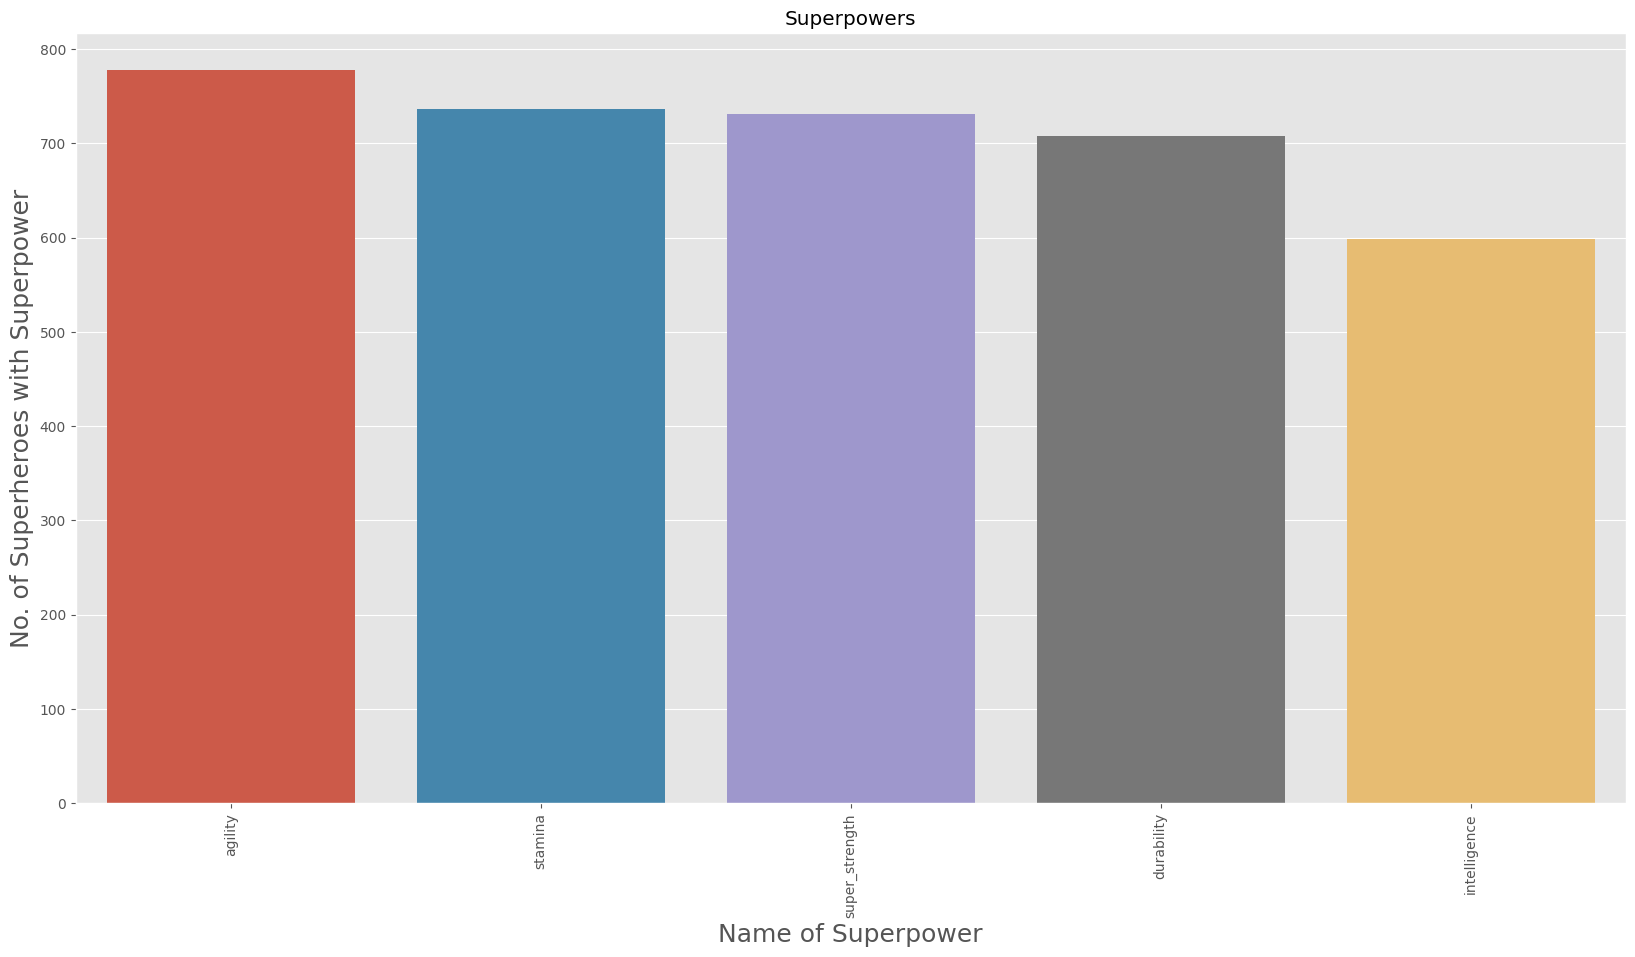

In [27]:
plt.style.use('ggplot') # Using ggplot2 style visuals

fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=superpowers['index'].head(5), y=superpowers['Total'].head(5), data=superpowers)
f.set_xlabel("Name of Superpower",fontsize=18)
f.set_ylabel("No. of Superheroes with Superpower",fontsize=18)
f.set_title('Superpowers')
for item in f.get_xticklabels():
    item.set_rotation(90)

**5 Most Common Superpowers¶**

**1 - agility**

**2 - stamina**

**3 - super strength**

**4 - durability**

**5 - intelligence**

### Q3. Which race has the most immortal superheroes?

In [28]:
data['type_race'].value_counts()

type_race
Human              529
Mutant              99
God / Eternal       43
Metahuman           42
Alien               31
                  ... 
Lego                 1
Zen-Whoberian        1
Kakarantharaian      1
Human / Cosmic       1
Yoda's species       1
Name: count, Length: 67, dtype: int64

In [29]:
data.groupby(['type_race'])[['has_immortality']].sum().sort_values(by='has_immortality', ascending=False)

,has_immortality
type_race,
God / Eternal,36.0
Human,29.0
Demon,18.0
New God,11.0
Cosmic Entity,8.0
...,...
Alpha,0.0
Human-Spartoi,0.0
Human-Inhuman,0.0


## **God / Eternal** race has the Higest immortality power

## Q3. Name the creator having most superheroes of type “Parademon”.

In [30]:
# Filter superheroes of type "Parademon"
parademon_superheroes = data[data['type_race'] == 'Parademon']

# Find the creator with the most Parademon superheroes
creator_with_most_parademons = parademon_superheroes['creator'].value_counts().idxmax()

print("Creator with the most Parademon superheroes:", creator_with_most_parademons)


Creator with the most Parademon superheroes: DC Comics


## Creator with the most Parademon superheroes: **DC Comics**

## Q4. Which comic creator has most superhero teams?

In [31]:
data.groupby('creator')[['teams']].count().sort_values(by='teams', ascending=False)

,teams
creator,
Marvel Comics,615
DC Comics,444
Shueisha,37
Dark Horse Comics,29
Lego,22
George Lucas,18
Image Comics,17
NBC - Heroes,16
Ubisoft,9


## **Marvel Comics** Have most superhero teams

## Q5(a). Find names, real names and alias of superhero who is part of most teams.

In [32]:
# Find the superhero with the most teams
superhero_with_most_teams = data.loc[data['teams'].apply(lambda x: len(x.split(','))).idxmax()]

# Extract required information
superhero_name = superhero_with_most_teams['name']
real_name = superhero_with_most_teams['real_name']
aliases = superhero_with_most_teams['aliases']

print("Superhero Name:", superhero_name)
print("Real Name:", real_name)
print("Aliases:", aliases)


Superhero Name: Wolverine
Real Name: Logan
Aliases: ['Weapon X, Weapon Ten, Death, Mutate 9601, Jim Logan, Emilio Garra, Weapon Chi, Experiment X, Agent Ten, Peter Richards, Mai kethLogan, Mr. Patch']


**Superhero Name:** [Wolverine]

**Real Name:** [Logan]

**Aliases:** [['Weapon X, Weapon Ten, Death, Mutate 9601, Jim Logan, Emilio Garra, Weapon Chi, Experiment X, Agent Ten, Peter Richards, Mai kethLogan, Mr. Patch']]


## Q5(B). Are there any crossovers between creators and teams?

In [33]:
# Group the data by creator and count the number of unique teams for each creator
creator_teams_count = data.groupby('creator')['teams'].nunique()
creator_teams_count.sort_values(ascending=False)

creator
Marvel Comics             241
DC Comics                 153
George Lucas                8
Dark Horse Comics           5
Shueisha                    5
J. K. Rowling               3
Wildstorm                   2
SyFy                        2
J. R. R. Tolkien            2
Hasbro                      2
Star Trek                   2
Disney                      2
Cartoon Network             2
Stephen King                1
Microsoft                   1
Team Epic TV                1
South Park                  1
Sony Pictures               1
Sega                        1
Ubisoft                     1
Nintendo                    1
Namco                       1
Universal Studios           1
NBC - Heroes                1
Mortal Kombat               1
ABC Studios                 1
Mattel                      1
Matt Groening               1
Lego                        1
Blizzard Entertainment      1
Image Comics                1
Icon Comics                 1
Ian Fleming                 1
ID

In [34]:

# Check if there are any creators associated with multiple teams
creators_with_multiple_teams = creator_teams_count[creator_teams_count > 1]

if not creators_with_multiple_teams.empty:
    print("Yes, there are crossovers between creators and teams.")
    print("Creators with multiple teams:")
    print(creators_with_multiple_teams)
else:
    print("No, there are no crossovers between creators and teams.")





Yes, there are crossovers between creators and teams.
Creators with multiple teams:
creator
Cartoon Network        2
DC Comics            153
Dark Horse Comics      5
Disney                 2
George Lucas           8
Hasbro                 2
J. K. Rowling          3
J. R. R. Tolkien       2
Marvel Comics        241
Shueisha               5
Star Trek              2
SyFy                   2
Wildstorm              2
Name: teams, dtype: int64


## Q6. What are the characteristics that can predict a superhero alignment.

### **Ans - Predicting a superhero's alignment based on characteristics involves performing a classification analysis. In our dataset, the 'alignment' column represents the superhero's alignment (e.g., good, bad). To predict alignment, We can use machine learning techniques.**

In [35]:
pd.set_option('display.max_rows', 5000)
data['occupation'].apply(lambda x: len(str(x).split(';')) if pd.notnull(x) else 0).head()

0    0
1    0
2    2
3    0
4    0
Name: occupation, dtype: int64

In [36]:
# Let's filter out features on which we'll training our model. we'll be considering those columns who will be related to power 
X = data[['overall_score', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score','occupation', 'gender', 'type_race', 'creator', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'has_energy_absorption',
       'has_cold_resistance', 'has_magic', 'has_telekinesis',
       'has_toxin_and_disease_resistance', 'has_telepathy', 'has_regeneration',
       'has_immortality', 'has_teleportation', 'has_force_fields',
       'has_energy_manipulation', 'has_endurance', 'has_longevity',
       'has_weapon-based_powers', 'has_energy_blasts', 'has_enhanced_senses',
       'has_invulnerability', 'has_stealth', 'has_marksmanship', 'has_flight',
       'has_accelerated_healing', 'has_weapons_master', 'has_intelligence',
       'has_reflexes', 'has_super_speed', 'has_durability', 'has_stamina',
       'has_agility', 'has_super_strength', 'total_superpowers']]

In [37]:
y = data['alignment']

## We need to do Some feature engineering before creating the model

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   overall_score                     1450 non-null   object 
 1   intelligence_score                1450 non-null   int64  
 2   strength_score                    1450 non-null   int64  
 3   speed_score                       1450 non-null   int64  
 4   durability_score                  1450 non-null   int64  
 5   power_score                       1450 non-null   int64  
 6   combat_score                      1450 non-null   int64  
 7   occupation                        1014 non-null   object 
 8   gender                            1305 non-null   object 
 9   type_race                         1043 non-null   object 
 10  creator                           1311 non-null   object 
 11  has_electrokinesis                1383 non-null   float64
 12  has_en

## Handling null values in Occupation column and changing it to Numerical way. we are defining a custum way

In [40]:
# Split occupations using both ';' and ','
X['occupations_list'] = X['occupation'].apply(lambda x: str(x).replace(',', ';').split(';') if pd.notnull(x) else [])

# Count the number of occupations for each superhero
X['occupation_count'] = X['occupations_list'].apply(lambda x: len(x))

In [41]:
X.drop(columns=['occupation', 'occupations_list'], inplace=True)

In [42]:
X['gender'].fillna('Unknown', inplace=True)

In [43]:
X['type_race'].fillna('Unknown', inplace=True)

In [44]:
# Perform one-hot encoding for the 'gender' column
X = pd.get_dummies(X, columns=['gender'], prefix='gender', dummy_na=True)
X = pd.get_dummies(X, columns=['type_race'], prefix='type_race', dummy_na=True)


In [45]:
X['creator'].fillna('Unknown', inplace=True)

In [46]:
# Define a list of dominant creators
dominant_creators = ['Marvel Comics', 'DC Comics']

# Group less frequent creators as 'Other'
X['creator_processed'] = X['creator'].apply(lambda x: x if x in dominant_creators else 'Other')
# Perform one-hot encoding for the 'creator_processed' column
X = pd.get_dummies(X, columns=['creator_processed'], prefix='creator', dummy_na=True)


In [47]:
columns_to_fill_na = ['has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'has_energy_absorption',
       'has_cold_resistance', 'has_magic', 'has_telekinesis',
       'has_toxin_and_disease_resistance', 'has_telepathy', 'has_regeneration',
       'has_immortality', 'has_teleportation', 'has_force_fields',
       'has_energy_manipulation', 'has_endurance', 'has_longevity',
       'has_weapon-based_powers', 'has_energy_blasts', 'has_enhanced_senses',
       'has_invulnerability', 'has_stealth', 'has_marksmanship', 'has_flight',
       'has_accelerated_healing', 'has_weapons_master', 'has_intelligence',
       'has_reflexes', 'has_super_speed', 'has_durability', 'has_stamina',
       'has_agility', 'has_super_strength']
X[columns_to_fill_na] = X[columns_to_fill_na].fillna(0)

In [48]:
import numpy as np

# Replace non-numeric values (such as '-') with NaN in the 'overall_score' column
X['overall_score'] = pd.to_numeric(X['overall_score'], errors='coerce')

# Find the maximum value in the 'overall_score' column
max_score = X['overall_score'].replace(np.inf, np.nan).max()

# Replace '∞' values with max_score + 1
X['overall_score'] = X['overall_score'].replace(np.inf, max_score + 1)
mean_score = X['overall_score'].mean()

# Fill NaN values with the mean score
X['overall_score'].fillna(mean_score, inplace=True)


In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'creator' column using label encoding
X['creator_encoded'] = label_encoder.fit_transform(X['creator'])
X.drop(columns=['creator'], inplace=True)

In [50]:
X.isnull().sum()

overall_score                       0
intelligence_score                  0
strength_score                      0
speed_score                         0
durability_score                    0
power_score                         0
combat_score                        0
has_electrokinesis                  0
has_energy_constructs               0
has_mind_control_resistance         0
has_matter_manipulation             0
has_telepathy_resistance            0
has_mind_control                    0
has_enhanced_hearing                0
has_dimensional_travel              0
has_element_control                 0
has_size_changing                   0
has_fire_resistance                 0
has_fire_control                    0
has_dexterity                       0
has_reality_warping                 0
has_illusions                       0
has_energy_beams                    0
has_peak_human_condition            0
has_shapeshifting                   0
has_heat_resistance                 0
has_jump    

In [51]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y_encoded contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Predict alignment on the test data
predictions = clf.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5620689655172414
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.29      0.35        91
           1       0.58      0.84      0.69       158
           2       1.00      0.11      0.20        27
           3       0.67      0.14      0.24        14

    accuracy                           0.56       290
   macro avg       0.67      0.34      0.37       290
weighted avg       0.58      0.56      0.51       290



## This is Just a demostration of classification is there.. lot of feature enginnering, experiments, Hyperparameter tuning have to be done to get the best possible Model.

## Q7. From history of superheroes, 

**a. Find list of superheroes having negative past but now aligned positively.
(Negativity of past can be decided by multiple methods, please use which is familiar to you)**


#### Ans- To find negativity of a superhero's past can be subjective and context-dependent. One apprach could be One way to approach this task looking it as Sentiment analysis on 'history_text' column that might indicate a negative past. Let's try to build Sentiment analysis using  pretrained **GLove model**

In [54]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer



# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def filter_negative_superheroes(text):
    # Check for NaN values
    if isinstance(text, str):  # Only apply sentiment analysis to non-null strings
        sentiment_score = sid.polarity_scores(text)
        # Use a threshold to classify sentiment (adjust as needed)
        if sentiment_score['compound'] < -0.1:
            return True  # Superhero with negative past
    return False  # Superhero with positive or neutral past



/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [55]:
data['history_text'].isnull().sum()

90

In [56]:
# Treating na
data['history_text'].fillna('No available history.', inplace=True)


In [57]:
# Apply sentiment analysis and filtering to the 'history_text' column
data['has_negative_past'] = data['history_text'].apply(filter_negative_superheroes)

# Filter superheroes with negative pasts
superheroes_with_negative_past = data[data['has_negative_past']]

# List of superheroes with negative pasts
superheroes_with_negative_past_names = superheroes_with_negative_past['name'].tolist()

# Print the list of superheroes with negative pasts
print(superheroes_with_negative_past_names)

['514A (Gotham)', 'A-Bomb', 'Abe Sapien', 'Abin Sur', 'Abomination', 'Abra Kadabra (CW)', 'Absorbing Man (MCU)', 'Absorbing Man', 'Ace Morgan', 'Acidicus', 'Adam Monroe', 'Adam Strange', 'Agent 13', 'Agent Bob', 'Agent Carter', 'Agent Coulson (Destroyer Gun)', 'Agent Zero', 'A.I.M. Agent', 'Air-Walker', 'Ajax (FOX)', 'Ajax', 'Akita', 'Alex Danvers (CW)', 'Alex Mercer', 'Alfred Pennyworth', 'Alita', 'All-father Hercules', 'Allan Quatermain', "Altaïr Ibn-La'Ahad", 'Amanda Waller', 'Amazo', 'Ammo', 'Amygdala', 'Anacondrai Serpent', 'Ancalagon', 'Ancient One (MCU)', 'Angel Dust', 'Angel Of Death', 'Angel Salvadore (FOX)', 'Angel Salvadore', 'Angel', 'Animal Man', 'Annihilus', 'Ant-Man', 'Anti-Monitor', 'Anti-Spawn', 'Anti-Venom', 'Apocalypse (FOX)', 'Aquababy', 'Aqualad II', 'Aqualad', 'Aquaman', 'Aracnido Jr.', 'Aragorn', 'Archangel', 'Arclight', 'Arcturus', 'Arkade', 'Arkillo', 'Armor', 'Arnim Zola (MCU)', 'Arsenal (CW)', 'Arsenal', 'Artemis (CW)', 'Arthur Dayne', 'Aspheera', 'Asura', 'A

## Q8. Report on the 10 superheroes with most relatives, status of those relatives where possible, and the alignment of those superheroes.

In [58]:
data['relatives'] = data['relatives'].fillna('')

In [59]:
import re
def count_relatives(relatives_string):
    # Split the string by ',' and ';', then count the elements
    relatives_list = re.split(r',|;', relatives_string)
    # Filter out empty strings and return the count
    return len([relative.strip() for relative in relatives_list if relative.strip()])

# Apply the function to the 'relatives' column and create a new column 'num_relatives'
data['num_relatives'] = data['relatives'].apply(count_relatives)

# Get the top 10 superheroes with the most relatives
top_10_superheroes = data.nlargest(10, 'num_relatives')

In [60]:
top_10_superheroes[['name', 'relatives']].reset_index()

,index,name,relatives
0,936,Namor,"Elanna (maternal ancestor), Tanas (maternal an..."
1,574,Havok,Oscar Summers (adoptive paternal distant ances...
2,75,Aquaman,"Koryak (son), Arthur Curry, Jr. (son), A.J. (s..."
3,1100,Robin V,"Talia al Ghul (mother),\nBruce Wayne (Batman, ..."
4,121,Baron Zemo,"Harbin Zemo (distant ancestor, deceased);\nHad..."
5,340,Cyclops,Oscar Summers (adoptive paternal distant ances...
6,515,Ghost Rider (King Of Hell),"Illyana Kale (maternal ancestor, deceased); De..."
7,1251,Supergirl,"Zor-El (father), Allura In-Ze (mother), Jor-El..."
8,312,Colossus,"Grigory Efimovich Rasputin (great-grandfather,..."
9,1328,Toxin,"Carl Brock (father, estranged), Janine Brock (..."


## Q9. Find out any other interesting insights from given data

**Ans- There could be many insigts we can find out from the dataset. We have one column i.e Alignment columns we can try to find out most powerfull Superhero with Good Allignment**

In [61]:
data['total_score'] = data['intelligence_score'] + data['strength_score'] + data['speed_score'] + data['durability_score'] + data['power_score']+data['combat_score']

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/conda/lib/python3.10/site-packages/seaborn/categori

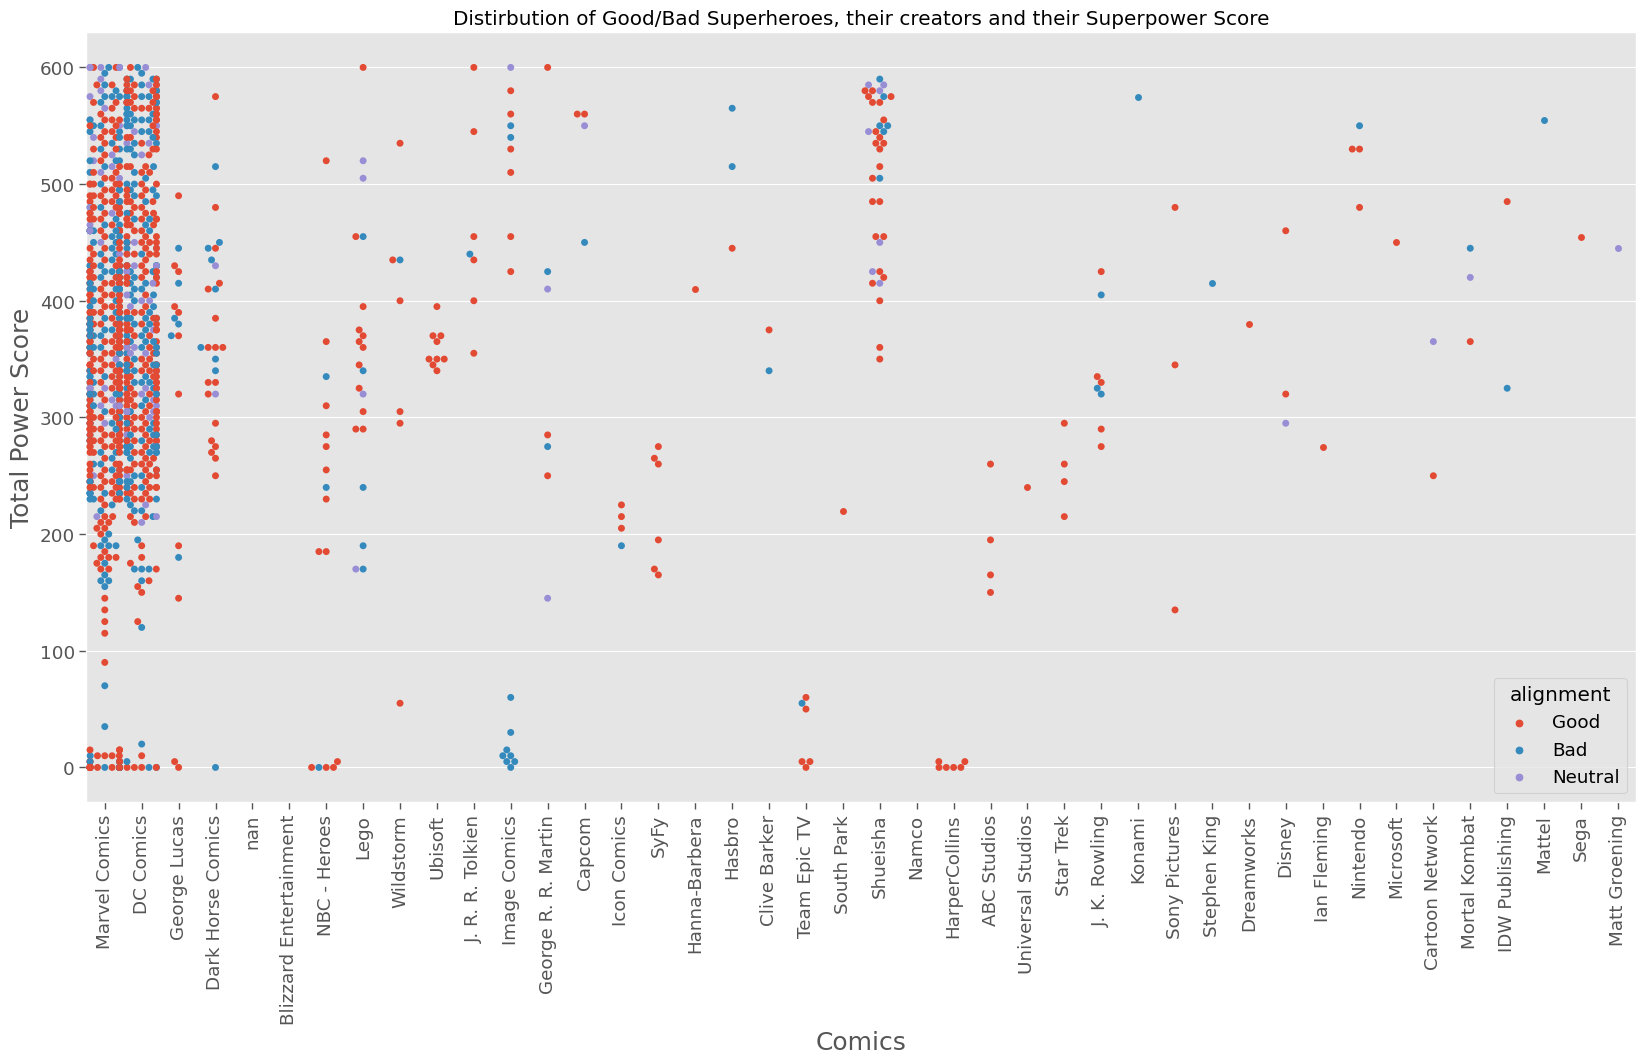

In [62]:
plt.style.use('ggplot') # Using ggplot2 style visuals

fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

sns.set_context("paper", font_scale=1.5)
f=sns.swarmplot(x=data["creator"], y=data['total_score'],hue=data["alignment"],data=data)
f.set_xlabel("Comics",fontsize=18)
f.set_ylabel("Total Power Score",fontsize=18)
f.set_title('Distirbution of Good/Bad Superheroes, their creators and their Superpower Score')
for item in f.get_xticklabels():
    item.set_rotation(90)

In [63]:
data_good = data.sort_values(['overall_score', 'total_superpowers'], ascending=[False, False])
data_good.loc[data_good['alignment'] == 'Good'].head(1)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_superpowers,has_negative_past,num_relatives,total_score
174,Black Alice,Lori Zechlin,Lori Zechlin,∞,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,1.0,1.0,0.0,0.0,1.0,1.0,42.0,True,2,565


### **Black Alice** is the strongest Good Superhero.

## Q9. Which 3 comic characters can you recommend to your friends to read or watch?

In [64]:
# Filter characters with positive alignment and high overall scores
recommended_characters = data[(data['alignment'] == 'Good') 
                              & (data['overall_score'] != '∞')
                              & (data['overall_score'] != '-')]
recommended_characters['overall_score'] = recommended_characters['overall_score'].astype(float)

# Sort characters by overall score in descending order and select the top 3
top_characters = recommended_characters.sort_values(by='overall_score', ascending=False).head(3)

# Print the recommended characters
print("Top 3 Comic Characters to Recommend:")
for index, character in top_characters.iterrows():
    print(f"{character['name']} (Creator: {character['creator']}, Overall Score: {character['overall_score']})")


Top 3 Comic Characters to Recommend:
Devilman (Creator: Shueisha, Overall Score: 229.0)
Golden Ninja (Creator: Lego, Overall Score: 226.0)
Aztar (Creator: DC Comics, Overall Score: 222.0)


## Below will be the 3 Reccommended Comics
**Devilman (Creator: Shueisha, Overall Score: 229.0)**

**Golden Ninja (Creator: Lego, Overall Score: 226.0)**

**Aztar (Creator: DC Comics, Overall Score: 222.0)**
